In [1]:
from glob import glob
import pandas as pd
from tqdm import tqdm

In [2]:
files = glob('../data/out/**/*.nq')

In [24]:
len(files)

24935

In [25]:
files[0]

'../data/out/2019/dpef.html-embedded-jsonld.nq-00347.nq'

In [26]:
quad_count_by_year = {2019: 0, 2020: 0, 2021: 0}
for fpath in tqdm(files):
    year = int(fpath.split('/')[3])
    with open(fpath) as f:
        quad_count_by_year[year] += len(list(f))

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 24935/24935 [01:17<00:00, 320.60it/s]


In [27]:
quad_count_by_year

{2019: 9495809, 2020: 26964260, 2021: 29137643}

In [28]:
quad_count_dist_by_year = {2019: [], 2020: [], 2021: []}
for fpath in tqdm(files):
    year = int(fpath.split('/')[3])
    with open(fpath) as f:
        quad_count_dist_by_year[year].append(len(list(f)))

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 24935/24935 [01:37<00:00, 256.42it/s]


0.0 zeros


<AxesSubplot: >

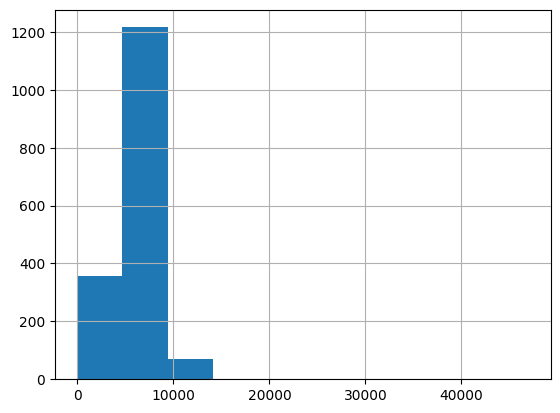

In [29]:
print(len([c for c in quad_count_dist_by_year[2019] if c == 0]) / len(quad_count_dist_by_year[2019]), 'zeros')
display(pd.Series(quad_count_dist_by_year[2019]).hist())

0.0 zeros


<AxesSubplot: >

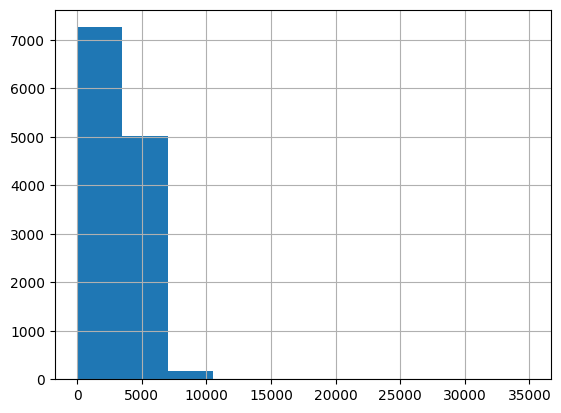

In [30]:
print(len([c for c in quad_count_dist_by_year[2020] if c == 0]) / len(quad_count_dist_by_year[2020]), 'zeros')
display(pd.Series(quad_count_dist_by_year[2020]).hist())

0.0 zeros


<AxesSubplot: >

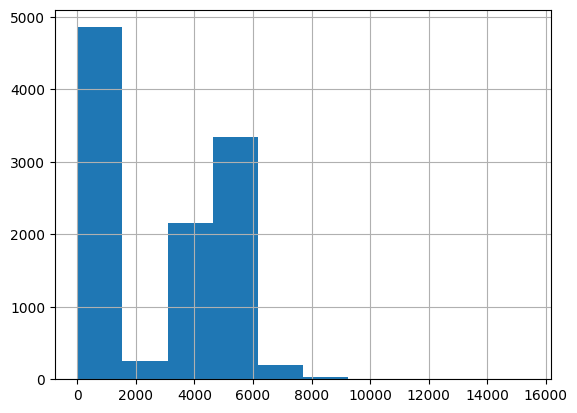

In [31]:
print(len([c for c in quad_count_dist_by_year[2021] if c == 0]) / len(quad_count_dist_by_year[2021]), 'zeros')

display(pd.Series(quad_count_dist_by_year[2021]).hist())

In [18]:
files[0]

'../data/out/2019/dpef.html-microdata.nq-01412.nq'

In [20]:
for fpath in tqdm(files):
    with open(fpath) as f:
        if len(list(f)) == 0:
            devbox_fpath = fpath.replace('../data', '/nfs/data/webdatacommons')
            with open('remove_empty_files.sh', 'a') as f:
                f.write(f'rm {devbox_fpath}\n')

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 46977/46977 [01:21<00:00, 575.75it/s]


In [21]:
!head remove_empty_files.sh

rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-01412.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-mf-hcard.nq-00632.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-mf-hcard.nq-00542.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-00967.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-03246.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-02663.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-00632.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-01087.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-05192.nq
rm /nfs/data/webdatacommons/out/2019/dpef.html-microdata.nq-02743.nq


In [4]:
import dask.dataframe

In [6]:
df = dask.dataframe.read_csv('../data/out/**/*.nq', include_path_column=True, names=['s', 'p', 'o', 'g'])

In [7]:
from dask.distributed import Client

client = Client(n_workers=5, threads_per_worker=2, memory_limit="10GB")
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 46.57 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41751,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 46.57 GiB
Comm: tcp://127.0.0.1:37565,Total threads: 2
Dashboard: http://127.0.0.1:39683/status,Memory: 9.31 GiB
Nanny: tcp://127.0.0.1:35201,


In [8]:
df.s.value_counts().compute()

https://doi.org/10.21410/7E4/EATFBW                                100947
http://www.montorioveronese.it/calendario/#newsarticle              71980
https://angelsbailbonds.com/#website                                58926
https://www.i7news.ig.com.br/#newsarticle                           54074
https://doi.org/10.18419/darus-1121                                 47632
                                                                    ...  
http://data.legilux.public.lu/eli/etat/leg/rgd/1978/12/01/n1/jo         2
http://data.legilux.public.lu/eli/etat/leg/agd/1963/02/08/n1/jo         2
http://data.legilux.public.lu/eli/etat/leg/agd/1963/02/23/n1/jo         2
http://data.legilux.public.lu/eli/etat/leg/agd/1963/04/22/n1/jo         2
http://data.legilux.public.lu/eli/etat/leg/a/1925/08/07/n2/jo           2
Name: s, Length: 2194639, dtype: int64

In [9]:
df.p.value_counts().compute()

http://schema.org/image                            5895191
http://www.w3.org/1999/02/22-rdf-syntax-ns#type    3082702
http://schema.org/name                             2644072
http://schema.org/url                              2574399
http://schema.org/keywords                         2572007
                                                    ...   
http://www.w3.org/ns/oa#hasBody                          1
http://schema.org/MainEntityofPage                       1
http://schema.org/gender                                 1
http://schema.org/CourseCode                             1
http://schema.org/MusicAlbumProductionType               1
Name: p, Length: 552, dtype: int64

In [10]:
lrmi_preds = ["http://purl.org/dcx/lrmi-terms/targetURL",
"http://purl.org/dcx/lrmi-terms/educationalRole",
"http://purl.org/dcx/lrmi-terms/targetName",
"http://purl.org/dcx/lrmi-terms/educationalAlignment",
"http://schema.org/targetDescription",
"http://purl.org/dcx/lrmi-terms/useRightsURL",
"http://schema.org/targetName",
"http://purl.org/dcx/lrmi-terms/teaches",
"http://schema.org/targetURL",
"http://schema.org/educationalLevel",
"http://purl.org/dcx/lrmi-terms/educationalUse",
"http://schema.org/educationalAlignment",
"http://purl.org/dcx/lrmi-terms/isBasedOnUrl",
"http://schema.org/educationalUse",
"http://purl.org/dcx/lrmi-terms/typicalAgeRange",
"http://schema.org/typicalAgeRange",
"http://schema.org/license",
"http://purl.org/dcx/lrmi-terms/educationalFramework",
"http://purl.org/dcx/lrmi-terms/targetDescription",
"http://schema.org/teaches",
"http://schema.org/interactivityType",
"http://purl.org/dcx/lrmi-terms/learningResourceType",
"http://schema.org/isBasedOn",
"http://schema.org/educationalRole",
"http://purl.org/dcx/lrmi-terms/educationalLevel",
"http://purl.org/dcx/lrmi-terms/assesses",
"http://schema.org/isBasedOnUrl",
"http://schema.org/assesses",
"http://purl.org/dcx/lrmi-terms/alignmentType",
"http://schema.org/learningResourceType",
"http://schema.org/educationalFramework",
"http://schema.org/alignmentType",
"http://purl.org/dcx/lrmi-terms/timeRequired",
"http://schema.org/timeRequired",
"http://purl.org/dcx/lrmi-terms/interactivityType",
]

In [12]:
df[df.p.isin(lrmi_preds)].p.value_counts().compute()

http://schema.org/timeRequired            2109435
http://schema.org/license                  548120
http://schema.org/isBasedOn                151443
http://schema.org/typicalAgeRange           42305
http://schema.org/learningResourceType      39256
http://schema.org/interactivityType         18457
http://schema.org/educationalUse             8118
http://schema.org/educationalLevel           5850
http://schema.org/teaches                    5761
http://schema.org/educationalAlignment       2389
http://schema.org/targetName                 1151
http://schema.org/targetDescription          1040
http://schema.org/educationalFramework        566
http://schema.org/alignmentType               566
http://schema.org/isBasedOnUrl                 99
http://schema.org/assesses                     82
http://schema.org/educationalRole              10
Name: p, dtype: int64

In [ ]:
df[df.p == ]